In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from src.code.simulation.galton_watson import GaltonWatson
from src.code.simulation.probability_distributions import create_distributions
from src.code.simulation.utils import plot_zn_distribution, test_loi_exponentielle
from src.code.simulation.yaglom import simulation_yaglom
from src.config.config import seed
from src.utils.utils import init_notebook

In [ ]:
init_notebook(seed)

# Théorème de Yaglom

## Mise au propre Yaglom

In [ ]:
distributions = create_distributions()

In [ ]:
alpha = 0.05
nb_repetitions = 100
nb_processus = 10_000
taille_pas = 2

In [ ]:
p_value_dict = {}
ks_dict = {}
lambda_dict = {}

In [ ]:
for nom_loi, loi in distributions.items():
    p_value, ks, lambda_ = simulation_yaglom(
        loi,
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    )

    p_value_dict[nom_loi] = p_value
    ks_dict[nom_loi] = ks
    lambda_dict[nom_loi] = lambda_

In [ ]:
p_value_df = pd.DataFrame(p_value_dict)
ks_df = pd.DataFrame(ks_dict)
lambda_df = pd.DataFrame(lambda_dict)

In [ ]:
p_value_df.to_csv("data/results/p-value-evolution.csv", index=False)
ks_df.to_csv("data/results/ks-evolution.csv", index=False)
lambda_df.to_csv("data/results/lambda-evolution.csv", index=False)

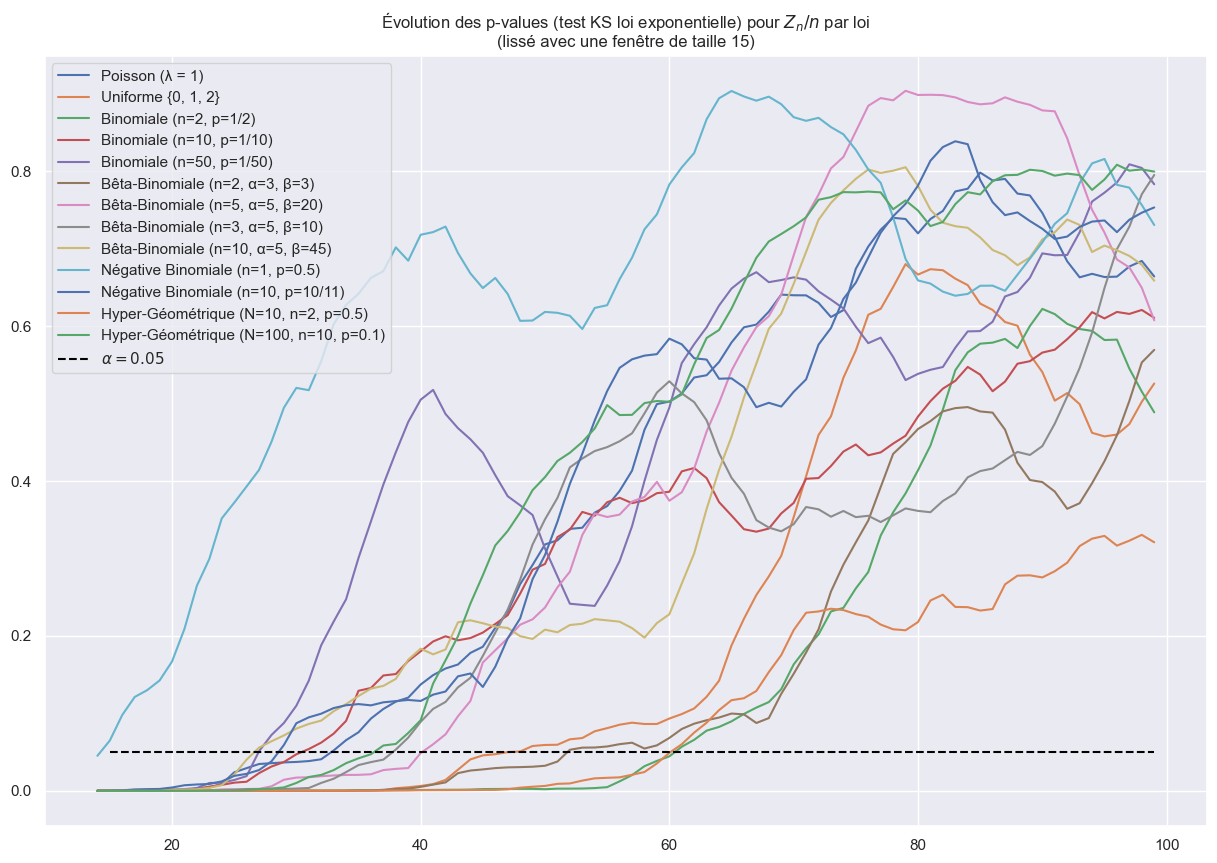

In [ ]:
periode_lissage = 15
p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
# plt.savefig("assets/img/p-values-evolution-all-laws.png")
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

<matplotlib.legend.Legend>

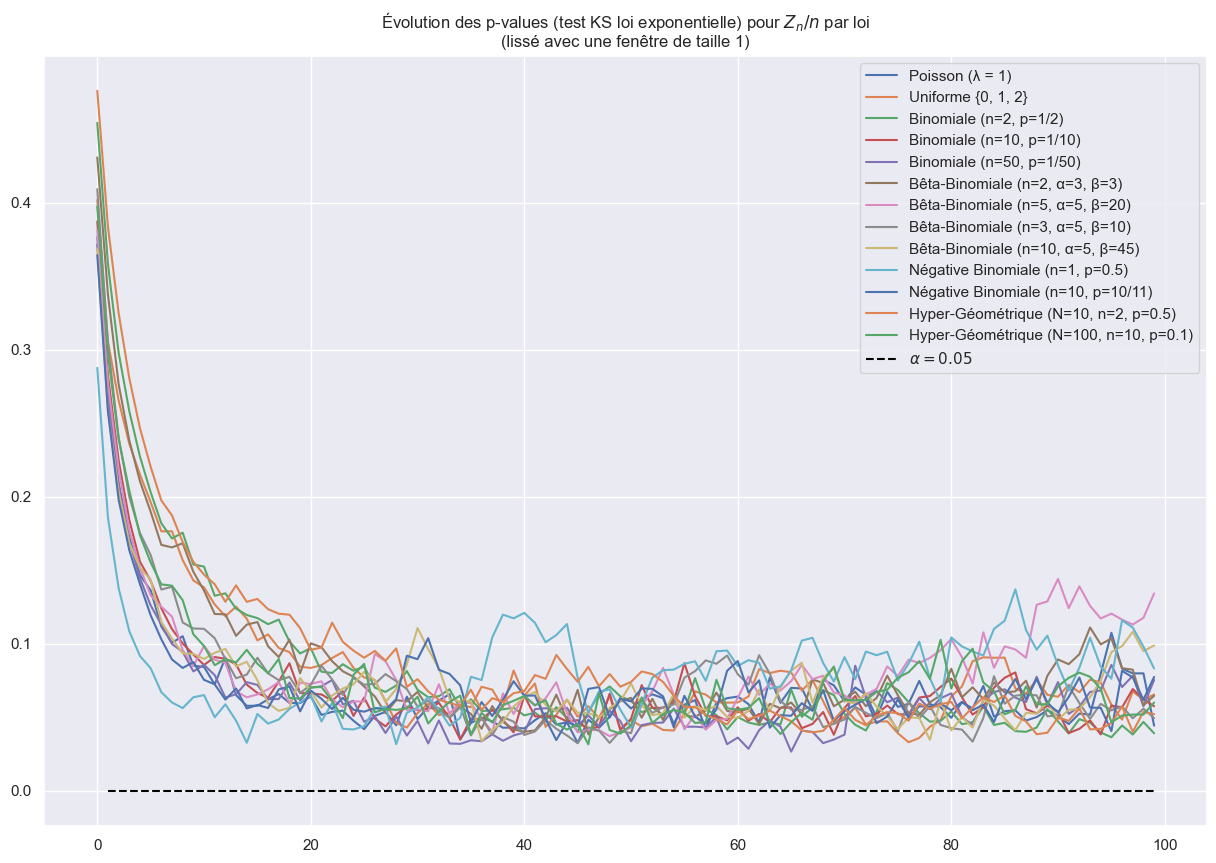

In [ ]:
periode_lissage = 1
ks_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [0 for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
# plt.savefig("assets/img/p-values-evolution-all-laws.png")
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

<matplotlib.legend.Legend>

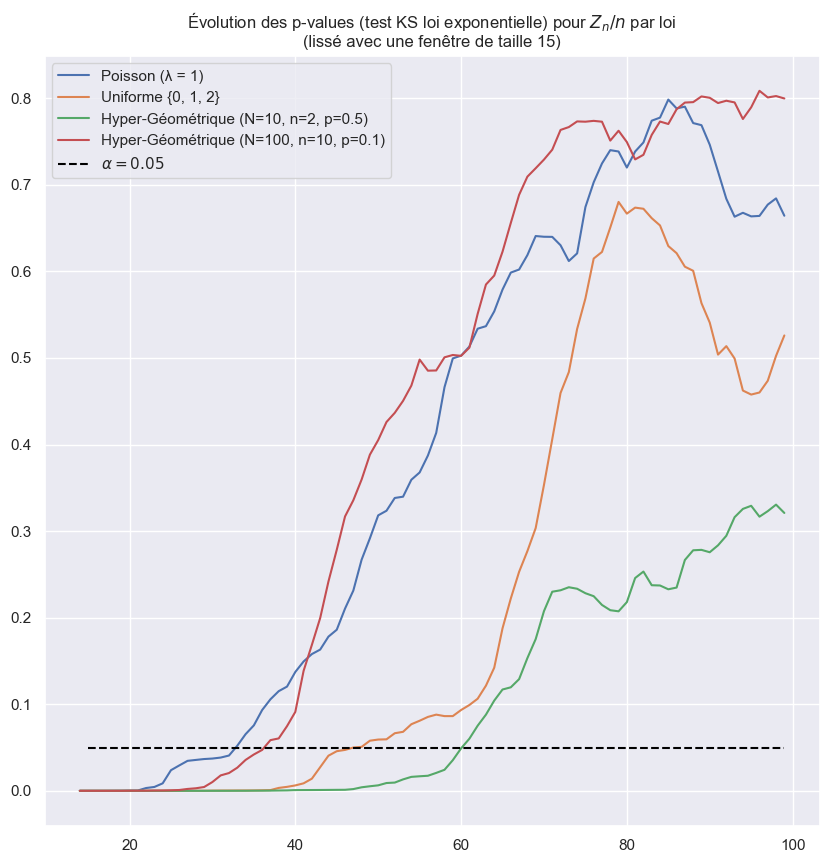

In [ ]:
periode_lissage = 15

p_value_df[
    [
        "Poisson (λ = 1)",
        "Uniforme {0, 1, 2}",
        "Hyper-Géométrique (N=10, n=2, p=0.5)",
        "Hyper-Géométrique (N=100, n=10, p=0.1)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

<matplotlib.legend.Legend>

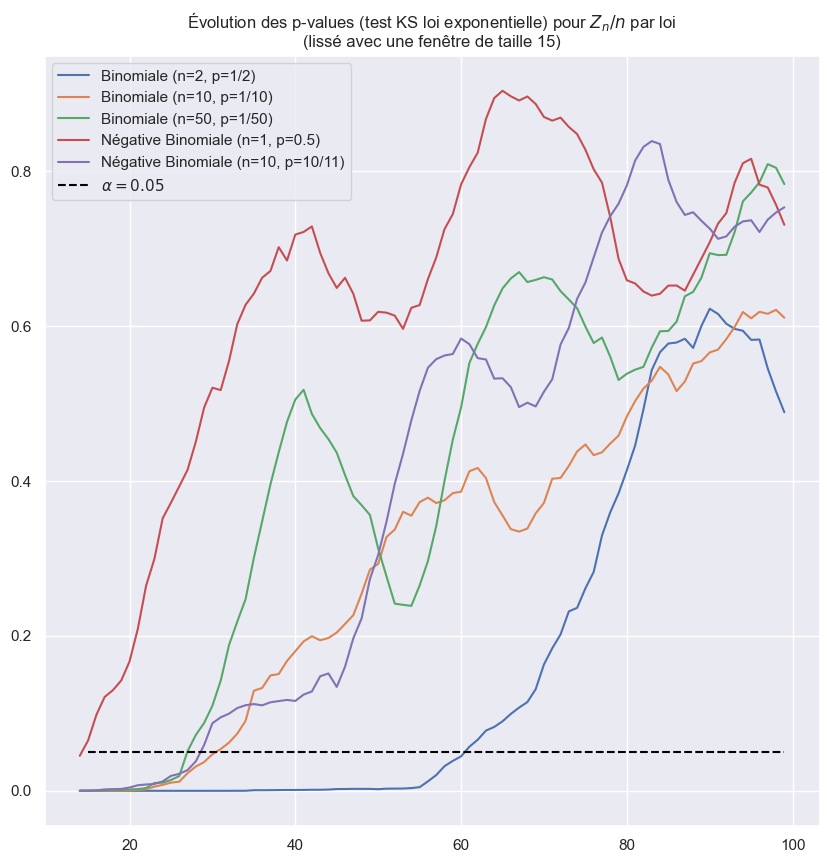

In [ ]:
periode_lissage = 15

p_value_df[
    [
        "Binomiale (n=2, p=1/2)",
        "Binomiale (n=10, p=1/10)",
        "Binomiale (n=50, p=1/50)",
        "Négative Binomiale (n=1, p=0.5)",
        "Négative Binomiale (n=10, p=10/11)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

<matplotlib.legend.Legend>

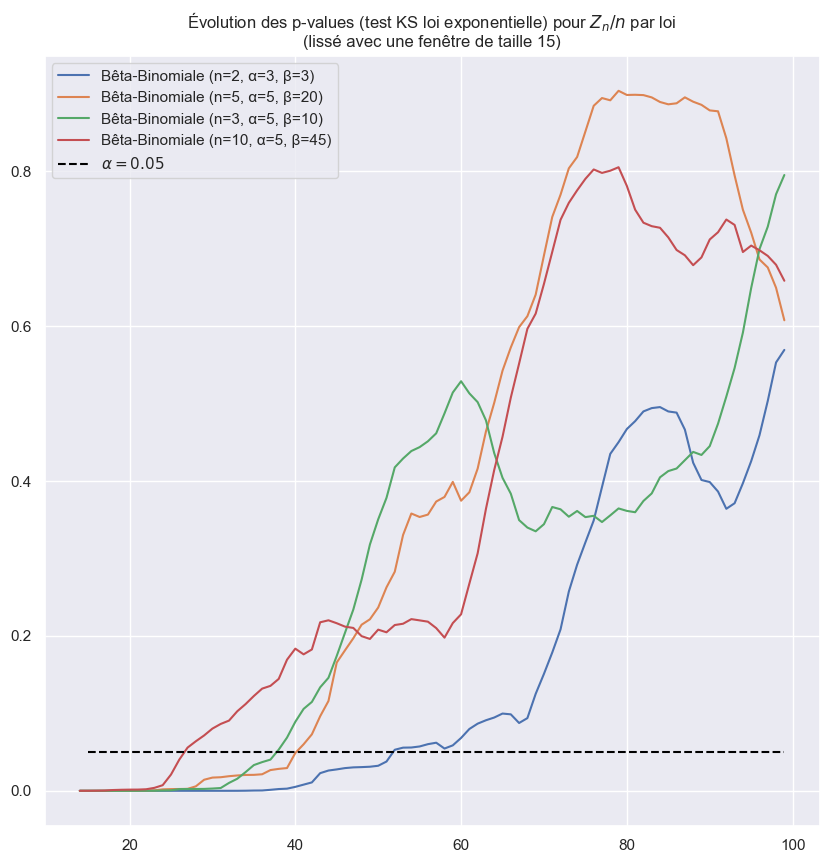

In [ ]:
periode_lissage = 15

p_value_df[
    [
        "Bêta-Binomiale (n=2, α=3, β=3)",
        "Bêta-Binomiale (n=5, α=5, β=20)",
        "Bêta-Binomiale (n=3, α=5, β=10)",
        "Bêta-Binomiale (n=10, α=5, β=45)",
    ]
].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})"
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

In [ ]:
def plot_p_value(nom_loi: str) -> None:
    """Affiche l'évolution de la p-value"""
    plt.plot(p_value_dict[nom_loi], label="p-value")
    plt.plot(
        list(range(nb_repetitions)),
        [alpha for _ in range(nb_repetitions)],
        label=r"$\alpha = 0.05$",
    )
    plt.legend()

<matplotlib.legend.Legend>

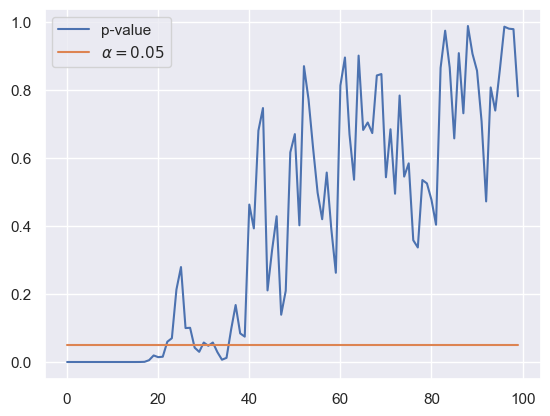

In [ ]:
plt.plot(
    simulation_yaglom(
        poisson_1,
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

<matplotlib.legend.Legend>

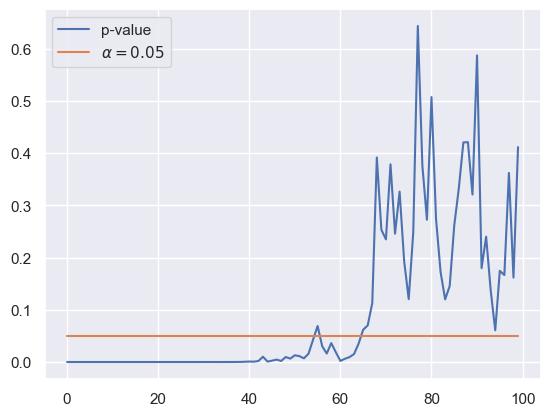

In [ ]:
plt.plot(
    simulation_yaglom(
        distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"],
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

<matplotlib.legend.Legend>

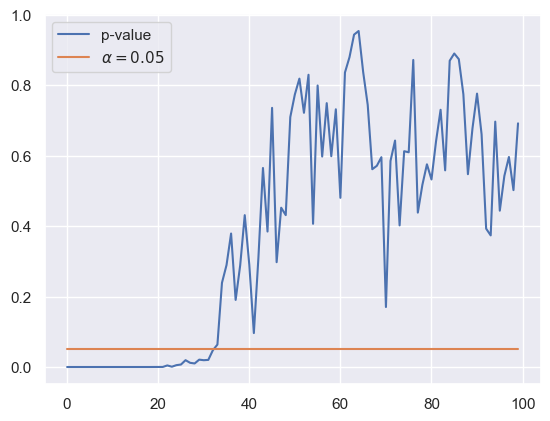

In [ ]:
plt.plot(
    simulation_yaglom(
        distributions["Hyper-Géométrique (N=100, n=10, p=0.1)"],
        nb_processus=nb_processus,
        taille_pas=taille_pas,
        nb_repetitions=nb_repetitions,
    ),
    label="p-value",
)
plt.plot(
    list(range(nb_repetitions)),
    [alpha for _ in range(nb_repetitions)],
    label=r"$\alpha = 0.05$",
)
plt.legend()

self.nb_simulations = 4332


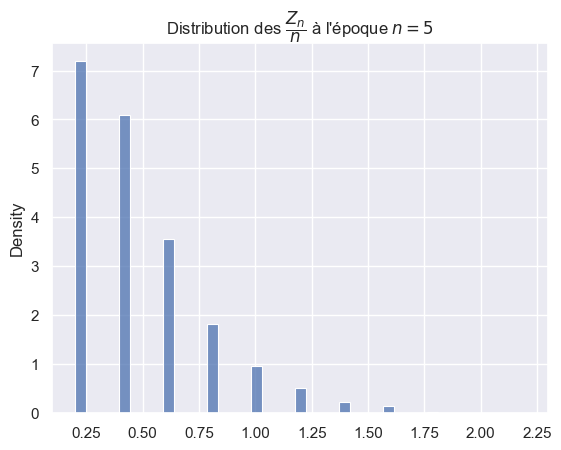

statistique_ks = 0.34800938966339673
p_value = 0.0
p_value = 0.0
self.nb_simulations = 2924


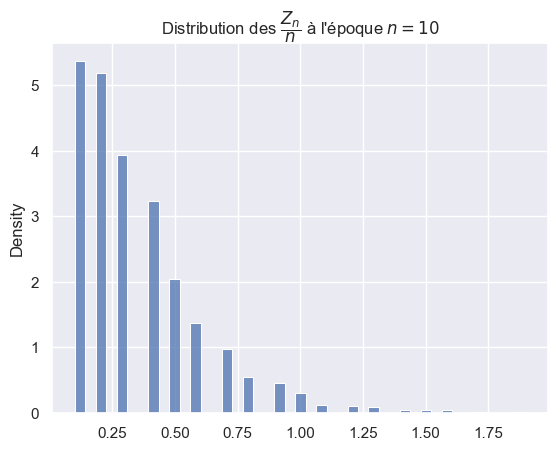

statistique_ks = 0.24871166802222294
p_value = 8.000644720451413e-160
p_value = 8.000644720451413e-160
self.nb_simulations = 2179


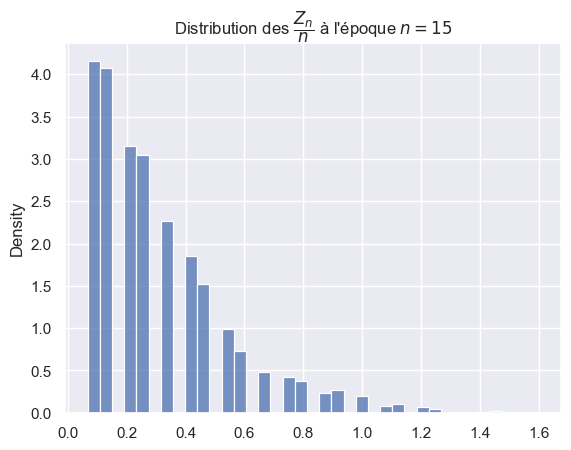

statistique_ks = 0.19422956123228005
p_value = 1.7376693459598994e-72
p_value = 1.7376693459598994e-72
self.nb_simulations = 1735


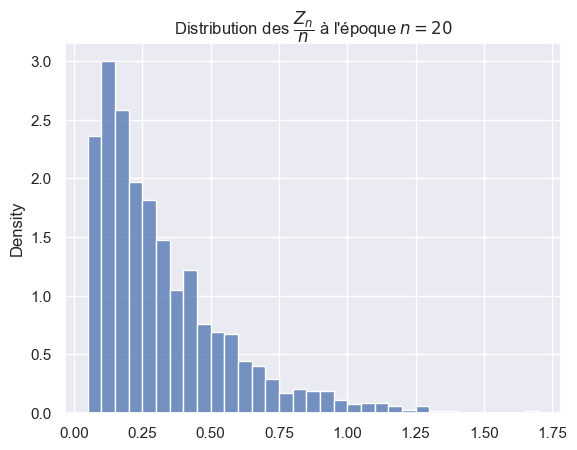

statistique_ks = 0.16958840036598355
p_value = 4.3060290350311006e-44
p_value = 4.3060290350311006e-44
self.nb_simulations = 1431


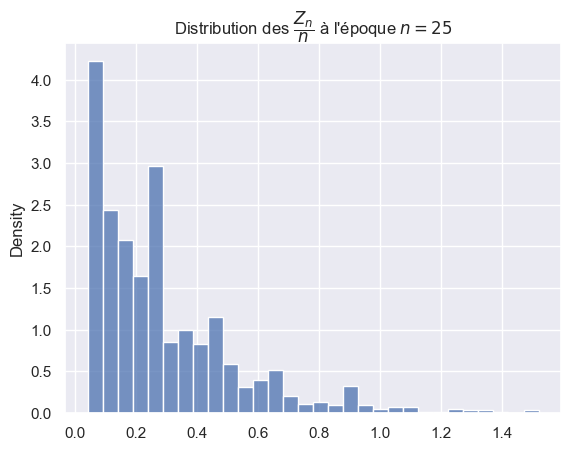

statistique_ks = 0.14731374552101129
p_value = 1.4355640021190942e-27
p_value = 1.4355640021190942e-27
self.nb_simulations = 1224


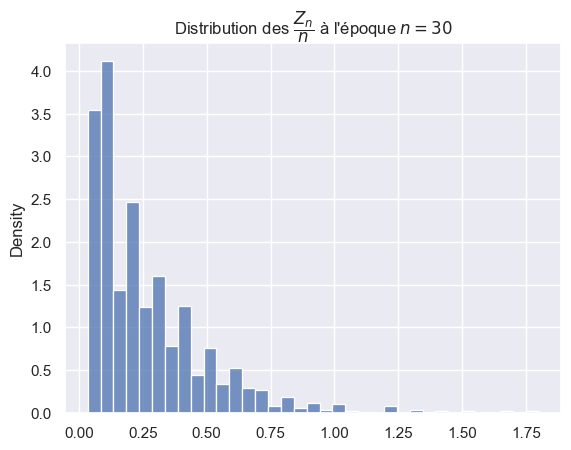

statistique_ks = 0.13336414280675138
p_value = 1.9097839885479138e-19
p_value = 1.9097839885479138e-19
self.nb_simulations = 1087


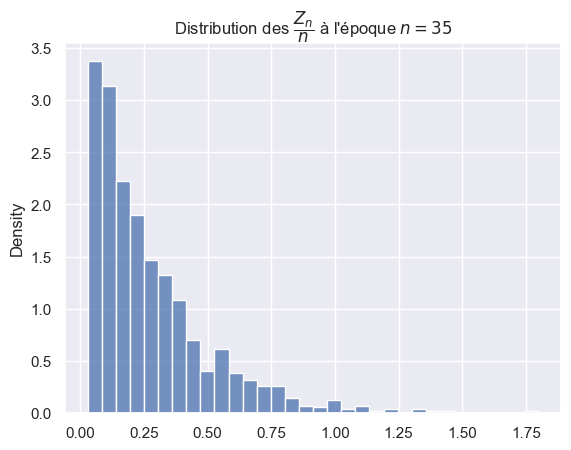

statistique_ks = 0.11224602910615405
p_value = 2.1965322875244356e-12
p_value = 2.1965322875244356e-12
self.nb_simulations = 968


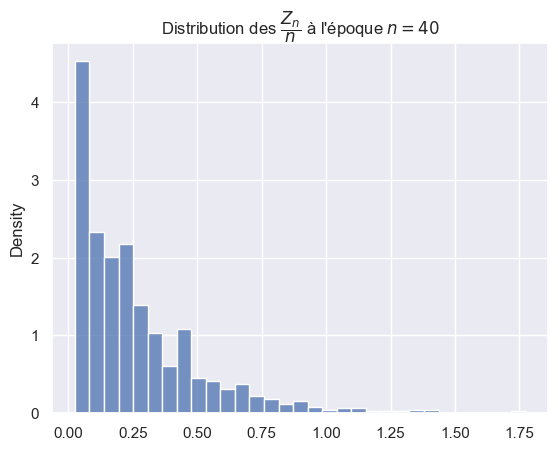

statistique_ks = 0.09311823711214773
p_value = 9.354832462134708e-08
p_value = 9.354832462134708e-08
self.nb_simulations = 871


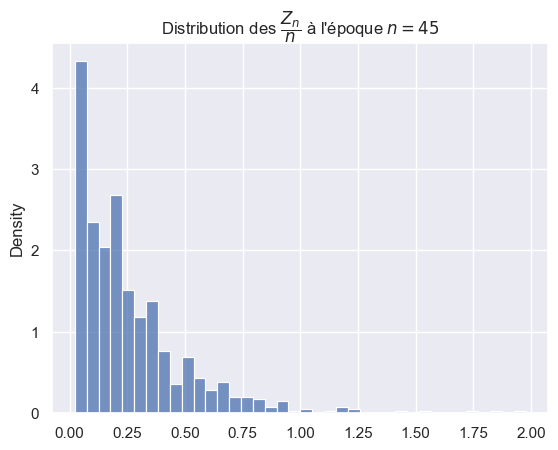

statistique_ks = 0.08228833670611206
p_value = 1.4057666077454234e-05
p_value = 1.4057666077454234e-05
self.nb_simulations = 781


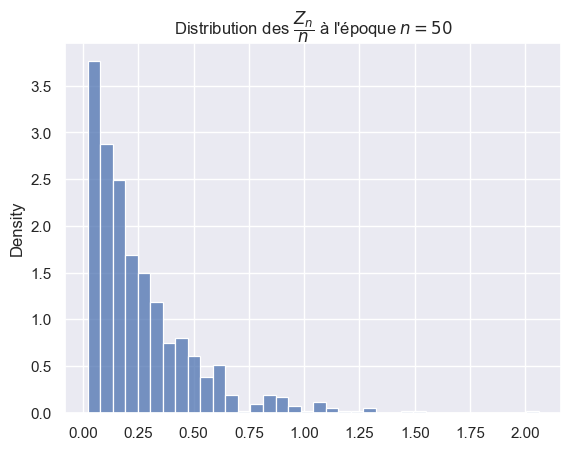

statistique_ks = 0.07439136231086041
p_value = 0.00033247476750641837
p_value = 0.00033247476750641837


In [ ]:
sim = SimulateurGaltonWatson(
    distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"], nb_processus=10_000
)
taille_pas = 5
nb_repetitions = 10
taille_echantillon = 50

for i in range(nb_repetitions):
    sim.simule(nb_epoques=taille_pas)
    sim.retire_processus_eteints()

    zn_sur_n = sim.get_zn_sur_n()
    zn_sur_n_sample = zn_sur_n[taille_echantillon:]

    plt.title(
        "Distribution des $\dfrac{Z_n}{n}$ à l'époque $n = "
        + str((i + 1) * taille_pas)
        + "$"
    )
    sns.histplot(zn_sur_n_sample, stat="density")
    plt.show()

    p_value, statistique_ks = test_loi_exponentielle(zn_sur_n)
    print(f"{p_value = }")